In [1]:
import math
from sympy import Matrix
import matplotlib.pyplot as plt

In [2]:
def find_matrix(C, b1, b2min, lambda1, lambda2, mu1, theta):
    sets = []
    p = []
    divideby = []
    B1 = []
    B2 = []
    V = []
    B = []
    n1max = C // b1
    n2max = C // b2min
    all_nodes = []
    current_index = 0
    
    for i in range(0,n1max+1):
        for j in range(0,n2max+1):
            total_amount = i*b1 + j*b2min
            if total_amount <= C:
                if i == n1max:
                    B1.append(current_index)
                if i != n1max and total_amount + b1 > C and i!=0:
                    V.append(current_index)
                if total_amount + b2min > C:
                    B2.append(current_index)
                if total_amount + b2min > C or i == n1max:
                    B.append(current_index)
                a = [i, j]
                all_nodes.append(a)
                current_index +=1
    print(all_nodes)
                
    # sets = [B, B1, B2, V]
    # node_amount = len(all_nodes)
    # for i in range(0,node_amount):
    #     temp = [0]*node_amount
    #     n1 = all_nodes[i][0]
    #     n2 = all_nodes[i][1]
    #     for j in range(0,node_amount):
    #         if n1 * b1 + n2 * b2min + b1 > C:
    #             if n2 > 0:
    #                 t = n2 - math.ceil((b1 - C + n1*b1 + n2*b2min)/b2min)
    #                 if all_nodes[j][0] == n1 + 1 and all_nodes[j][1] == t:
    #                     temp[j] = lambda1
    #         if n1==all_nodes[j][0]+1 and n2==all_nodes[j][1]:
    #                 temp[j] = n1*mu1
    #         elif n1==all_nodes[j][0]-1 and n2==all_nodes[j][1]:
    #             temp[j] = lambda1
    #         elif n2==all_nodes[j][1]+1 and n1==all_nodes[j][0]:
    #             temp[j] = (C - b1*all_nodes[i][0])/(all_nodes[i][1]*theta)
    #         elif n2==all_nodes[j][1]-1 and n1==all_nodes[j][0]:
    #             temp[j] = lambda2
    #     p.append(temp)
    #     divideby.append(sum(temp))
    # a = []
    # for i in range(0,len(p)):
    #     temp = []
    #     for j in range(0,len(p)):
    #         temp.append(p[j][i]/divideby[i])
    #     a.append(temp)
    #     a[i][i] = -1
    # a[0] = [1]*len(a)
    # B = [1] + [0]*(len(a)-1)
    # a = Matrix(a)
    # solutions = []
    # for i in range(a.shape[0]):
    #     Ai = a.copy()
    #     Ai[:, i] = B
    #     solutions.append(Ai.det() / a.det())
    # avg_req1 = 0
    # avg_req2 = 0
    # avg_req = 0
    # for i in range(node_amount):
    #     avg_req1 += all_nodes[i][0] * solutions[i]
    #     avg_req2 += all_nodes[i][1] * solutions[i]
    #     avg_req += (all_nodes[i][0] + all_nodes[i][1] ) * solutions[i]
    # return [solutions, sets,[avg_req, avg_req1, avg_req2]]

In [3]:
C = 15
b1 = 3
b2min = 5
g1 = 3
g2 = 3
lambda1 = 9
lambda2 = 7
mu1 = 6
theta = 4
find_matrix(C, b1, b2min, lambda1, lambda2, mu1, theta)

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [3, 0], [3, 1], [4, 0], [5, 0]]


In [3]:
def find_matrix2( C, b1, b2min, g1, g2, lambda1, lambda2, mu1, theta):
    sets = []
    p = []
    divideby = []
    B1 = []
    B2 = []
    V = []
    B = []
    n1max = (C-g2) // b1
    n2max = (C-g1) // b2min
    
    all_nodes = []
    current_index = 0
    for i in range(0,n1max+1):
        for j in range(0,n2max+1):
            total_amount = i*b1 + j*b2min
            if total_amount <= C:
                if i != n1max and total_amount + b1 > C and j!=0 and (j-1)*b2min >= g2:
                    V.append(current_index)
                if i == n1max or i*b1 + j*b2min + b1 > C and current_index not in V:
                    B1.append(current_index)
                if total_amount + b2min > C or j==n2max:
                    B2.append(current_index)
                if total_amount + b2min > C or i == n1max:
                    B.append(current_index)
                a = [i, j]
                all_nodes.append(a)
                current_index +=1
            
    sets = [B, B1, B2, V]
    node_amount = len(all_nodes)
    current_index = 0
    for i in range(0,node_amount):
        temp = [0]*node_amount
        n1 = all_nodes[i][0]
        n2 = all_nodes[i][1]
        for j in range(0,node_amount):
            if current_index in V:
                    t = n2 - math.ceil((b1 - C + n1*b1 + n2*b2min)/b2min)
                    if all_nodes[j][0] == n1 + 1 and all_nodes[j][1] == t:
                        temp[j] = lambda1
            if n1==all_nodes[j][0]+1 and n2==all_nodes[j][1]:
                    temp[j] = n1*mu1
            elif n1==all_nodes[j][0]-1 and n2==all_nodes[j][1]:
                temp[j] = lambda1
            elif n2==all_nodes[j][1]+1 and n1==all_nodes[j][0]:
                temp[j] = min(C - g2,C - b1*all_nodes[i][0])/(all_nodes[i][1]*theta)
            elif n2==all_nodes[j][1]-1 and n1==all_nodes[j][0]:
                temp[j] = lambda2
        p.append(temp)
        divideby.append(sum(temp))
        current_index += 1
    a = []
    for i in range(0,len(p)):
        temp = []
        for j in range(0, len(p)):
            temp.append(p[j][i]/divideby[i])
        a.append(temp)
        a[i][i] = -1
    a[0] = [1]*len(a)
    B = [1] + [0]*(len(a)-1)
    a = Matrix(a)
    solutions = []
    for i in range(a.shape[0]):
        Ai = a.copy()
        Ai[:, i] = B
        solutions.append(Ai.det() / a.det())
    avg_req1 = 0
    avg_req2 = 0
    avg_req = 0
    for i in range(node_amount):
        avg_req1 += all_nodes[i][0] * solutions[i]
        avg_req2 += all_nodes[i][1] * solutions[i]
        avg_req += (all_nodes[i][0] + all_nodes[i][1] ) * solutions[i]
    return [solutions, sets, [avg_req, avg_req1, avg_req2]]

In [4]:
def find_other_values(sets, solutions):
    bb1b2v = [0,0,0,0]
    for i in range(0, len(solutions)):
        if i in sets[0]:
            bb1b2v[0] += solutions[i]
        if i in sets[1]:
            bb1b2v[1] += solutions[i]
        if i in sets[2]:
            bb1b2v[2] += solutions[i]
        if i in sets[3]:
            bb1b2v[3] += solutions[i]
    return bb1b2v

In [5]:
C = 15
b1 = 3
b2min = 5
g1 = 3
g2 = 3
lambda1 = 9
lambda2 = 7
mu1 = 6
theta = 4

In [6]:
block1 = []
blockage11 = []
blockage12 = []
v1 = []
avg_req_amount1 = []
avg_req_amount11 = []
avg_req_amount12 = []
for i in range(1, 51):
    solutions,sets, avgs = find_matrix( C, b1, b2min, i, lambda2, mu1, theta )
    b1b2v = find_other_values(sets, solutions)
    block1.append(b1b2v[0])
    blockage11.append(b1b2v[1])
    blockage12.append(b1b2v[2])
    v1.append(b1b2v[3])
    avg_req_amount1.append(avgs[0])
    avg_req_amount11.append(avgs[1])
    avg_req_amount12.append(avgs[2])
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [7]:
blockage21 = []
blockage22 = []
v2 = []
avg_req_amount2 = []
for i in range(1, 51):
    solutions,sets, avgs = find_matrix2( C, b1, b2min, g1, g2, i, lambda2, mu1, theta)
    b1b2v = find_other_values(sets, solutions)
    blockage21.append(b1b2v[1])
    blockage22.append(b1b2v[2])
    v2.append(b1b2v[3])
    avg_req_amount2.append(avgs[0])
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [12]:
"pB11", blockage11,"pB12", blockage21,"pB21", blockage12,"pB22", blockage22, "p(V)1", v1, "p(V)2", v2, "N1", avg_req_amount1, "N2", avg_req_amount2

('pB11',
 [9.07152077695762e-7,
  2.45724395517987e-5,
  0.000157952930026852,
  0.000563459642203128,
  0.00145579394343134,
  0.00306748466257669,
  0.00561619222367729,
  0.00928006960052200,
  0.0141831553143057,
  0.0203901866109878,
  0.0279088781220535,
  0.0366972477064221,
  0.0466736802117589,
  0.0577278441447816,
  0.0697311168135669,
  0.0825456963785493,
  0.0960320108280909,
  0.110054347826087,
  0.124484830123963,
  0.139205969151957,
  0.154112069835040,
  0.169109756328057,
  0.184117860274292,
  0.199066874027993,
  0.213898129896522,
  0.228562827953521,
  0.243021001814972,
  0.257240484726968,
  0.271195917179159,
  0.284867821330902,
  0.298241755936189,
  0.311307557293064,
  0.324058666226677,
  0.336491537570457,
  0.348605126496100,
  0.360400444938821,
  0.371880180950839,
  0.383048373857591,
  0.393910138417519,
  0.404471431677191,
  0.414738856786224,
  0.424719498635399,
  0.434420786771062,
  0.443850381597342,
  0.453016080393016,
  0.461925740136265

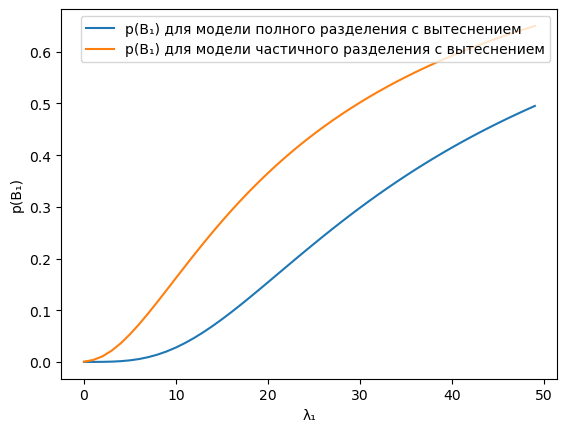

In [9]:
plt.plot(blockage11, label="p(B₁) для модели полного разделения с вытеснением")
plt.plot(blockage21, label="p(B₁) для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(B₁)")
plt.savefig("B11.png")

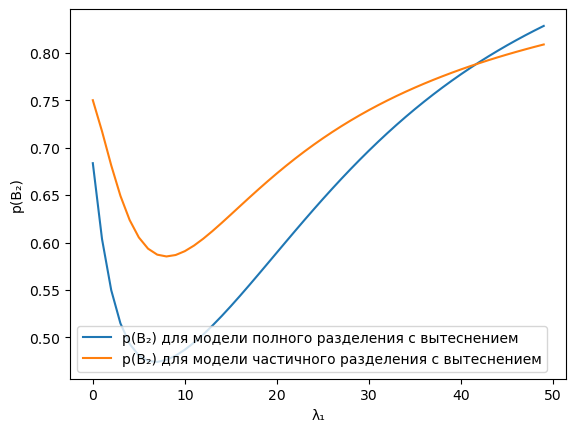

In [10]:
plt.plot(blockage12, label="p(B₂) для модели полного разделения с вытеснением")
plt.plot(blockage22, label="p(B₂) для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(B₂)")
plt.savefig("B21.png")

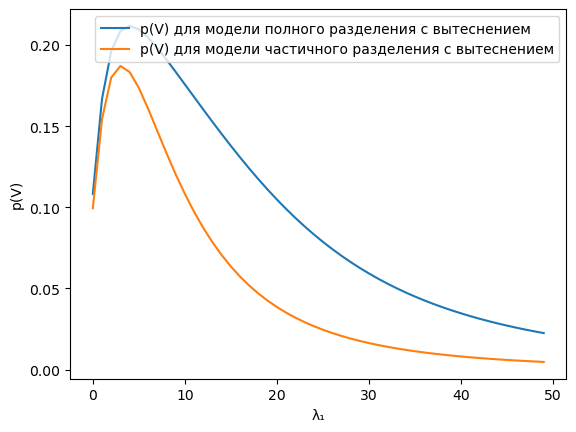

In [11]:
plt.plot(v1, label="p(V) для модели полного разделения с вытеснением")
plt.plot(v2, label="p(V) для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(V)")
plt.savefig("V1.png")

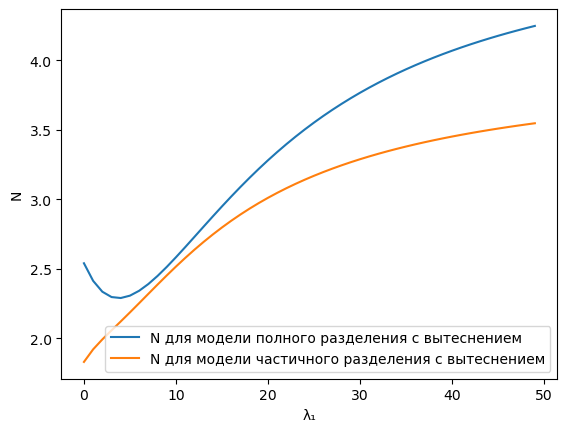

In [12]:
plt.plot(avg_req_amount1, label="N для модели полного разделения с вытеснением")
plt.plot(avg_req_amount2, label="N для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("N")
plt.savefig("N1.png")

In [39]:
C = 10
b1 = 2
b2min = 2
g1 = 4
g2 = 2
lambda1 = 5
lambda2 = 4
mu1 = 3
theta = 3

In [40]:
blockage21 = []
blockage22 = []
v2 = []
avg_req_amount2 = []
for i in range(1, 51):
    solutions,sets, avgs = find_matrix2( C, b1, b2min, g1, g2, i, lambda2, mu1, theta)
    b1b2v = find_other_values(sets, solutions)
    blockage21.append(b1b2v[1])
    blockage22.append(b1b2v[2])
    v2.append(b1b2v[3])
    avg_req_amount2.append(avgs[0])
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [41]:
blockage11 = []
blockage12 = []
v1 = []
avg_req_amount1 = []
for i in range(1, 51):
    solutions,sets, avgs = find_matrix( C, b1, b2min, i, lambda2, mu1, theta )
    b1b2v = find_other_values(sets, solutions)
    blockage11.append(b1b2v[1])
    blockage12.append(b1b2v[2])
    v1.append(b1b2v[3])
    avg_req_amount1.append(avgs[0])
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [21]:
"pB11", blockage11,"pB12", blockage21,"pB21", blockage12,"pB22", blockage22, "p(V)1", v1, "p(V)2", v2, "N1", avg_req_amount1, "N2", avg_req_amount2

('pB11',
 [2.45724395517987e-5,
  0.000563459642203126,
  0.00306748466257669,
  0.00928006960052199,
  0.0203901866109878,
  0.0366972477064220,
  0.0577278441447815,
  0.0825456963785497,
  0.110054347826087,
  0.139205969151957,
  0.169109756328057,
  0.199066874027994,
  0.228562827953521,
  0.257240484726968,
  0.284867821330903,
  0.311307557293064,
  0.336491537570457,
  0.360400444938820,
  0.383048373857591,
  0.404471431677191,
  0.424719498635398,
  0.443850381597341,
  0.461925740136265,
  0.479008303122442,
  0.495160012899197,
  0.510440828887399,
  0.524907995093072,
  0.538615630322667,
  0.551614539906095,
  0.563952176855402,
  0.575672701442458,
  0.586817103317515,
  0.597423361130070,
  0.607526622347699,
  0.617159391468724,
  0.626351718721682,
  0.635131384093780,
  0.643524073458870,
  0.651553544918208,
  0.659241784392400,
  0.666609150131426,
  0.673674506227892,
  0.680455345488579,
  0.686967902185261,
  0.693227255299336,
  0.699247422918693,
  0.70504144

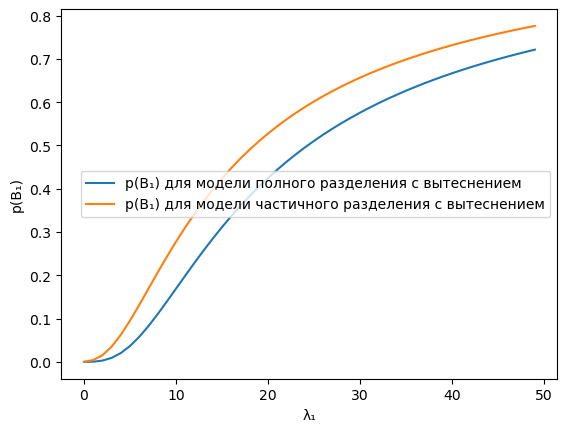

In [16]:
plt.plot(blockage11, label="p(B₁) для модели полного разделения с вытеснением")
plt.plot(blockage21, label="p(B₁) для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(B₁)")
plt.savefig("B12.png")

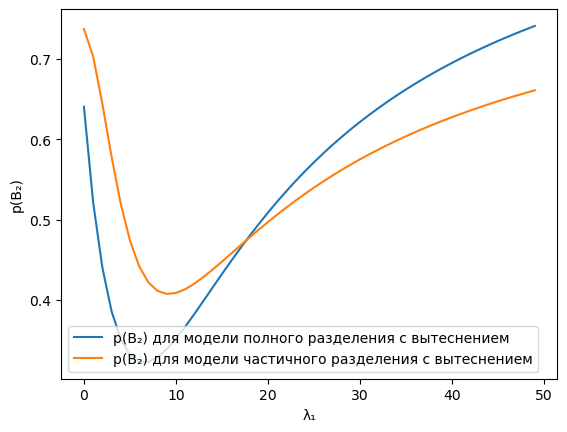

In [17]:
plt.plot(blockage12, label="p(B₂) для модели полного разделения с вытеснением")
plt.plot(blockage22, label="p(B₂) для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(B₂)")
plt.savefig("B22.png")

In [ ]:
plt.plot(block1, label="p(B) для модели полного разделения с вытеснением")
plt.plot(block2, label="p(B) для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(B)")
plt.savefig("BothB2.png")

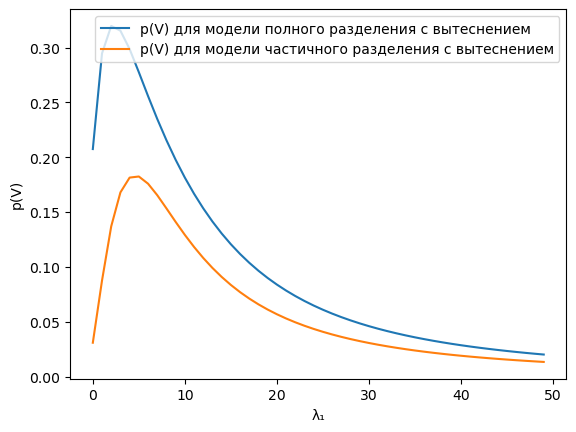

In [18]:
plt.plot(v1, label="p(V) для модели полного разделения с вытеснением")
plt.plot(v2, label="p(V) для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(V)")
plt.savefig("V2.png")

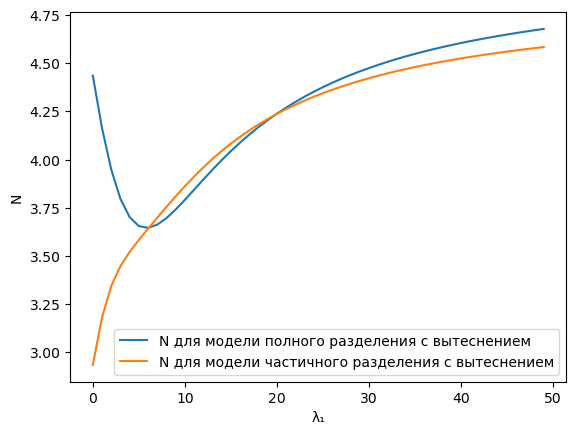

In [19]:
plt.plot(avg_req_amount1, label="N для модели полного разделения с вытеснением")
plt.plot(avg_req_amount2, label="N для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("N")
plt.savefig("N2.png")

In [35]:
C = 10
b1 = 2
b2min = 2
g1 = 2
g2 = 4
lambda1 = 5
lambda2 = 4
mu1 = 3
theta = 3

In [36]:
blockage218 = []
blockage228 = []
v28 = []
avg_req_amount28 = []
for i in range(1, 51):
    solutions,sets, avgs = find_matrix2( C, b1, b2min, g1, g2, i, lambda2, mu1, theta)
    b1b2v = find_other_values(sets, solutions)
    blockage218.append(b1b2v[1])
    blockage228.append(b1b2v[2])
    v28.append(b1b2v[3])
    avg_req_amount28.append(avgs[0])
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [37]:
C = 10
b1 = 2
b2min = 2
g1 = 4
g2 = 4
lambda1 = 5
lambda2 = 4
mu1 = 3
theta = 3

In [38]:
blockage219 = []
blockage229 = []
v29 = []
avg_req_amount29 = []
for i in range(1, 51):
    solutions,sets, avgs = find_matrix2( C, b1, b2min, g1, g2, i, lambda2, mu1, theta)
    b1b2v = find_other_values(sets, solutions)
    blockage219.append(b1b2v[1])
    blockage229.append(b1b2v[2])
    v29.append(b1b2v[3])
    avg_req_amount29.append(avgs[0])
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [29]:
"pB11", blockage11,"pB121", blockage21,"pB122", blockage218,"pB123", blockage219,"pB21", blockage12,"pB221", blockage22,"pB222", blockage228,"pB223", blockage229, "p(V)1", v1, "p(V)21", v2,"p(V)22", v28,"p(V)23", v29, "N1", avg_req_amount1, "N21", avg_req_amount2,"N22", avg_req_amount28,"N23", avg_req_amount29

('pB11',
 [2.45724395517987e-5,
  0.000563459642203126,
  0.00306748466257669,
  0.00928006960052199,
  0.0203901866109878,
  0.0366972477064220,
  0.0577278441447815,
  0.0825456963785497,
  0.110054347826087,
  0.139205969151957,
  0.169109756328057,
  0.199066874027994,
  0.228562827953521,
  0.257240484726968,
  0.284867821330903,
  0.311307557293064,
  0.336491537570457,
  0.360400444938820,
  0.383048373857591,
  0.404471431677191,
  0.424719498635398,
  0.443850381597341,
  0.461925740136265,
  0.479008303122442,
  0.495160012899197,
  0.510440828887399,
  0.524907995093072,
  0.538615630322667,
  0.551614539906095,
  0.563952176855402,
  0.575672701442458,
  0.586817103317515,
  0.597423361130070,
  0.607526622347699,
  0.617159391468724,
  0.626351718721682,
  0.635131384093780,
  0.643524073458870,
  0.651553544918208,
  0.659241784392400,
  0.666609150131426,
  0.673674506227892,
  0.680455345488579,
  0.686967902185261,
  0.693227255299336,
  0.699247422918693,
  0.70504144

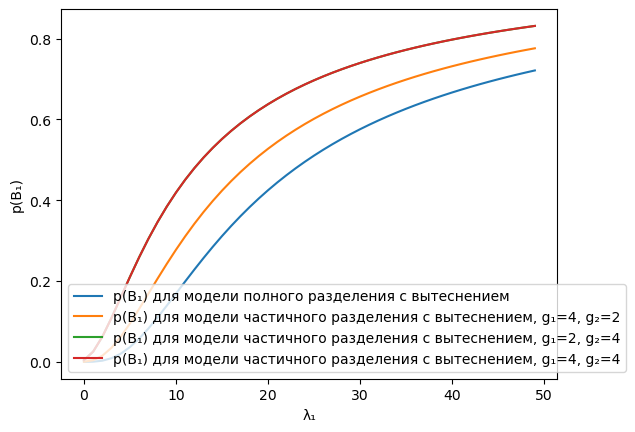

In [42]:
plt.plot(blockage11, label="p(B₁) для модели полного разделения с вытеснением")
plt.plot(blockage21, label="p(B₁) для модели частичного разделения с вытеснением, g₁=4, g₂=2")
plt.plot(blockage218, label="p(B₁) для модели частичного разделения с вытеснением, g₁=2, g₂=4")
plt.plot(blockage219, label="p(B₁) для модели частичного разделения с вытеснением, g₁=4, g₂=4")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(B₁)")
plt.savefig("B18.png")

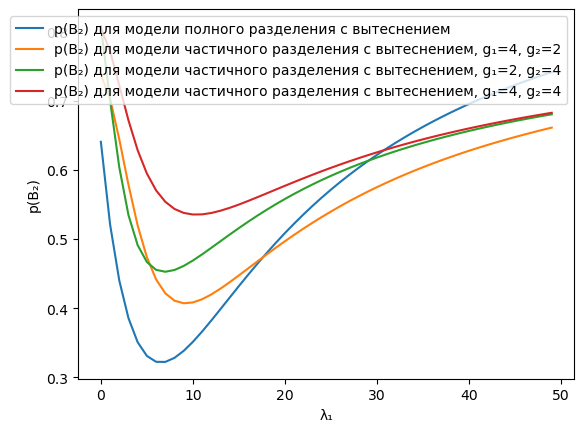

In [43]:
plt.plot(blockage12, label="p(B₂) для модели полного разделения с вытеснением")
plt.plot(blockage22, label="p(B₂) для модели частичного разделения с вытеснением, g₁=4, g₂=2")
plt.plot(blockage228, label="p(B₂) для модели частичного разделения с вытеснением, g₁=2, g₂=4")
plt.plot(blockage229, label="p(B₂) для модели частичного разделения с вытеснением, g₁=4, g₂=4")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(B₂)")
plt.savefig("B28.png")

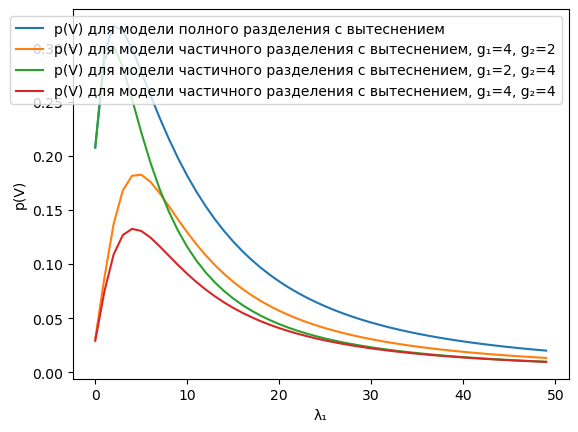

In [44]:
plt.plot(v1, label="p(V) для модели полного разделения с вытеснением")
plt.plot(v2, label="p(V) для модели частичного разделения с вытеснением, g₁=4, g₂=2")
plt.plot(v28, label="p(V) для модели частичного разделения с вытеснением, g₁=2, g₂=4")
plt.plot(v29, label="p(V) для модели частичного разделения с вытеснением, g₁=4, g₂=4")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(V)")
plt.savefig("V8.png")

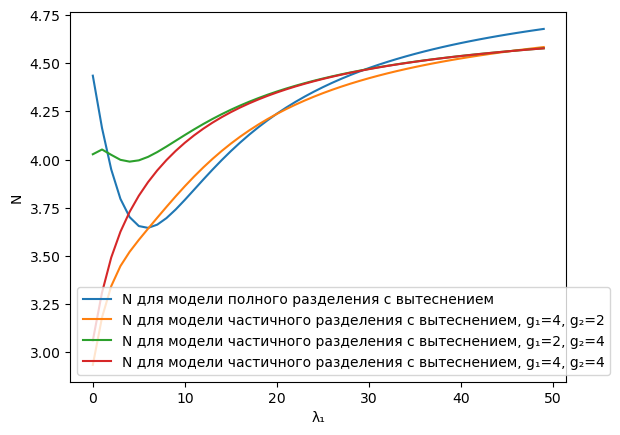

In [45]:
plt.plot(avg_req_amount1, label="N для модели полного разделения с вытеснением")
plt.plot(avg_req_amount2, label="N для модели частичного разделения с вытеснением, g₁=4, g₂=2")
plt.plot(avg_req_amount28, label="N для модели частичного разделения с вытеснением, g₁=2, g₂=4")
plt.plot(avg_req_amount29, label="N для модели частичного разделения с вытеснением, g₁=4, g₂=4")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("N")
plt.savefig("N8.png")

In [5]:
C = 24
b1 = 4
b2min = 3
g1 = 10
g2 = 10
lambda1 = 7
lambda2 = 4
mu1 = 5
theta = 5

In [6]:
blockage21 = []
blockage22 = []
v2 = []
avg_req_amount2 = []
for i in range(1, 51):
    solutions,sets, avgs = find_matrix2( C, b1, b2min, g1, g2, i, lambda2, mu1, theta)
    b1b2v = find_other_values(sets, solutions)
    blockage21.append(b1b2v[1])
    blockage22.append(b1b2v[2])
    v2.append(b1b2v[3])
    avg_req_amount2.append(avgs[0])
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [7]:
blockage11 = []
blockage12 = []
v1 = []
avg_req_amount1 = []
for i in range(1, 51):
    solutions,sets, avgs = find_matrix( C, b1, b2min, i, lambda2, mu1, theta )
    b1b2v = find_other_values(sets, solutions)
    blockage11.append(b1b2v[1])
    blockage12.append(b1b2v[2])
    v1.append(b1b2v[3])
    avg_req_amount1.append(avgs[0])
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [8]:
"pB11", blockage11,"pB12", blockage21,"pB21", blockage12,"pB22", blockage22, "p(V)1", v1, "p(V)2", v2, "N1", avg_req_amount1, "N2", avg_req_amount2

('pB11',
 [7.27760670954585e-8,
  3.81337713632538e-6,
  3.55631111312099e-5,
  0.000163599077454576,
  0.000510986203372511,
  0.00124942638217794,
  0.00258044017616978,
  0.00471082238411201,
  0.00782870269769330,
  0.0120845921450151,
  0.0175795720637462,
  0.0243608736361917,
  0.0324237749660940,
  0.0417180574680434,
  0.0521571152607855,
  0.0636280300084084,
  0.0760013312466904,
  0.0891396145495523,
  0.102904593505693,
  0.117162471395881,
  0.131787725759439,
  0.146665516177471,
  0.161692974156371,
  0.176779636475240,
  0.191847258886365,
  0.206829209849337,
  0.221669603493400,
  0.236322292821537,
  0.250749811078407,
  0.264922322158626,
  0.278816619812218,
  0.292415199540107,
  0.305705415581764,
  0.318678727380422,
  0.331330034555496,
  0.343657096030628,
  0.355660027007463,
  0.367340866511829,
  0.378703207948264,
  0.389751885243950,
  0.400492707574792,
  0.410932236225441,
  0.421077597761635,
  0.430936328332963,
  0.440516244544742,
  0.4498253369183

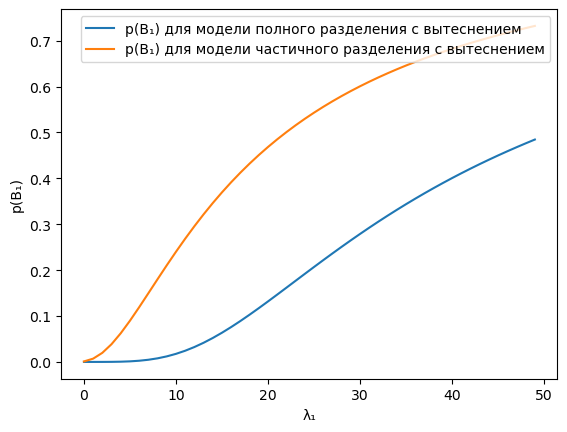

In [31]:
plt.plot(blockage11, label="p(B₁) для модели полного разделения с вытеснением")
plt.plot(blockage21, label="p(B₁) для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(B₁)")
plt.savefig("B16.png")

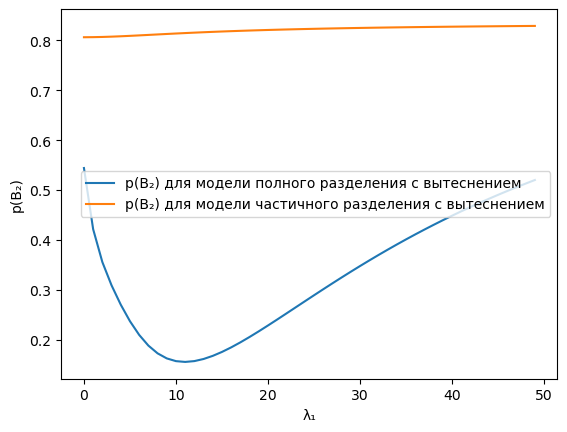

In [32]:
plt.plot(blockage12, label="p(B₂) для модели полного разделения с вытеснением")
plt.plot(blockage22, label="p(B₂) для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(B₂)")
plt.savefig("B26.png")

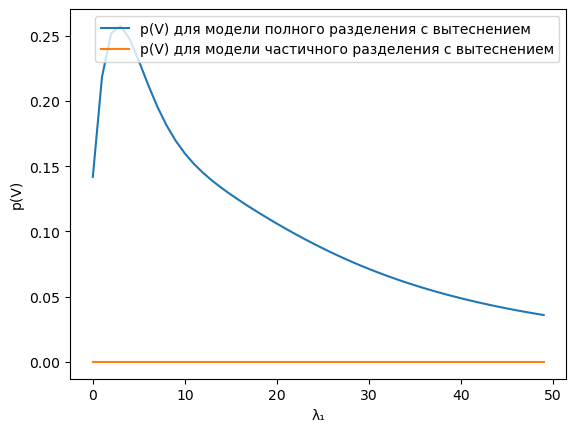

In [33]:
plt.plot(v1, label="p(V) для модели полного разделения с вытеснением")
plt.plot(v2, label="p(V) для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("p(V)")
plt.savefig("V6.png")

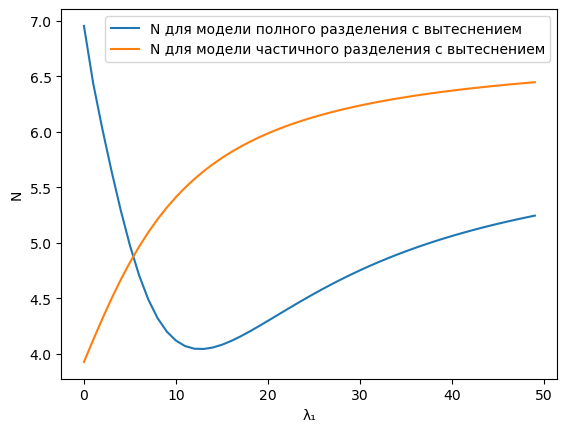

In [34]:
plt.plot(avg_req_amount1, label="N для модели полного разделения с вытеснением")
plt.plot(avg_req_amount2, label="N для модели частичного разделения с вытеснением")
plt.legend()
plt.xlabel("λ₁")
plt.ylabel("N")
plt.savefig("N6.png")